In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Activation Functions and Their Derivatives

---

## 1. Linear
*Function:*  $$ f(x) = x $$  

*Derivative:* $$ f'(x) = 1 $$  

---

## 2. Sigmoid
*Function:*  $$ f(x) = \frac{1}{1 + e^{-x}} $$  

*Derivative:**  $$ f'(x) = f(x)\,(1 - f(x)) $$  

---

## 3. Tanh
*Function:*  $$ f(x) = \tanh(x) $$  

*Derivative:*  $$ f'(x) = 1 - \tanh^2(x) $$  

---

## 4. ReLU
*Function:*  
$$
f(x) =
\begin{cases}
0, & x < 0 \\
x, & x \geq 0
\end{cases}
$$  

**Derivative:**  
$$
f'(x) =
\begin{cases}
0, & x < 0 \\
1, & x > 0
\end{cases}
$$  

In [3]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def tanh(x):
    return 1/(((np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))))

def relu(x):
    return np.maximum(0,x)

In [4]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh_derivative(x):
    return 1-np.power(tanh(x),2)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

In [9]:
x = np.arange(-5.0,5.0,0.1)
#print(x)

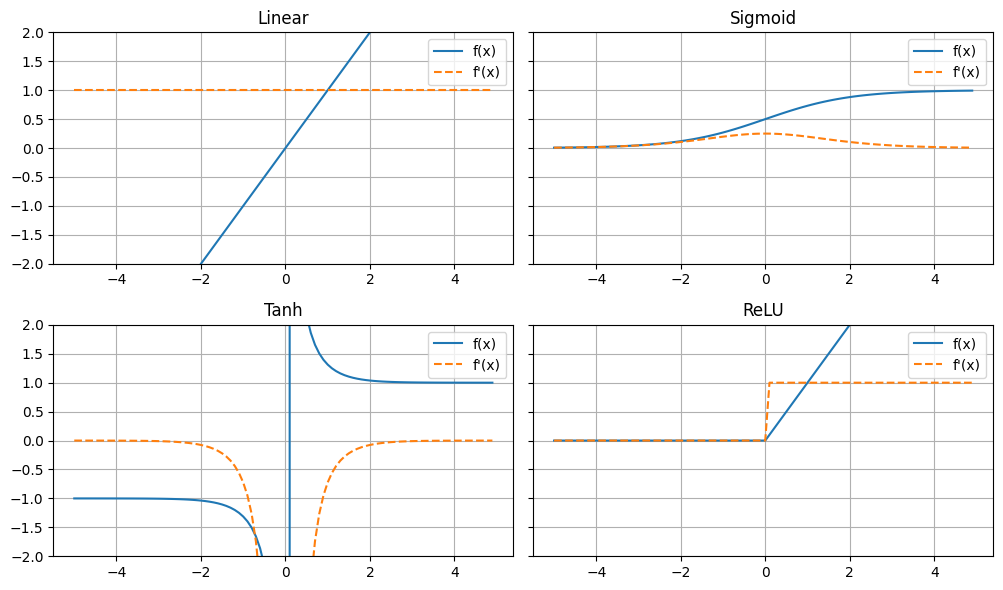

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharey=True)


# Linear
axs[0, 0].plot(x, x, label="f(x)")
axs[0, 0].plot(x, np.ones_like(x), '--', label="f'(x)")
axs[0, 0].set_title("Linear")

# Sigmoid
axs[0, 1].plot(x, sigmoid(x), label="f(x)")
axs[0, 1].plot(x, sigmoid_derivative(x), '--', label="f'(x)")
axs[0, 1].set_title("Sigmoid")

# Tanh
axs[1, 0].plot(x, tanh(x), label="f(x)")
axs[1, 0].plot(x, tanh_derivative(x), '--', label="f'(x)")
axs[1, 0].set_title("Tanh")

# ReLU
axs[1, 1].plot(x, relu(x), label="f(x)")
axs[1, 1].plot(x, relu_derivative(x), '--', label="f'(x)")
axs[1, 1].set_title("ReLU")

for ax in axs.flat:
    ax.set_ylim([-2, 2])
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

---

## 5. Leaky ReLU
**Function:**  
$$
f(x) =
\begin{cases}
\alpha x, & x < 0 \\
x, & x \geq 0
\end{cases}
$$  

**Derivative:**  
$$
f'(x) =
\begin{cases}
\alpha, & x < 0 \\
1, & x > 0
\end{cases}
$$  

---

## 6. ELU (Exponential Linear Unit)
**Function:**  
$$
f(x) =
\begin{cases}
\alpha(e^x - 1), & x < 0 \\
x, & x \geq 0
\end{cases}
$$  

**Derivative:**  
$$
f'(x) =
\begin{cases}
f(x) + \alpha, & x < 0 \\
1, & x \geq 0
\end{cases}
$$  

---

## 7. GELU (Gaussian Error Linear Unit)

**Function (exact):**  
$$
f(x) = x \cdot \Phi(x)
$$  
where \( \Phi(x) \) is the CDF of the standard normal distribution.  

**Approximation:**  
$$
f(x) \approx 0.5x \left(1 + \tanh\!\Big(\sqrt{\tfrac{2}{\pi}}(x + 0.044715x^3)\Big)\right)
$$  

**Derivative:**  
$$
f'(x) = \Phi(x) + x \cdot \phi(x)
$$  
where \( \phi(x) \) is the standard normal PDF.

In [14]:
def leaky_relu(alpha, x):
  return np.maximum(alpha * x, x)


def derivative_leaky_relu(alpha, x):
  #return np.maximum(alpha, 1) this won't work
  return np.where(x > 0, 1.0, alpha)


In [15]:
def elu(alpha, x):
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))
  # or the other way to this is using boolean mask (x>0)
  #return (x > 0) * x + (x <= 0) * alpha * (np.exp(x) - 1)


def derivative_elu(alpha, x):
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))

In [16]:
from math import pi
from scipy.special import erf

def gelu(x):
    return 0.5*x*(1 + erf(x/np.sqrt(2)))

def derivative_gelu(x):
    return 0.5*(1+erf(x/np.sqrt(2))) + x/(np.sqrt(2)*pi) * np.exp(-x*x/2)

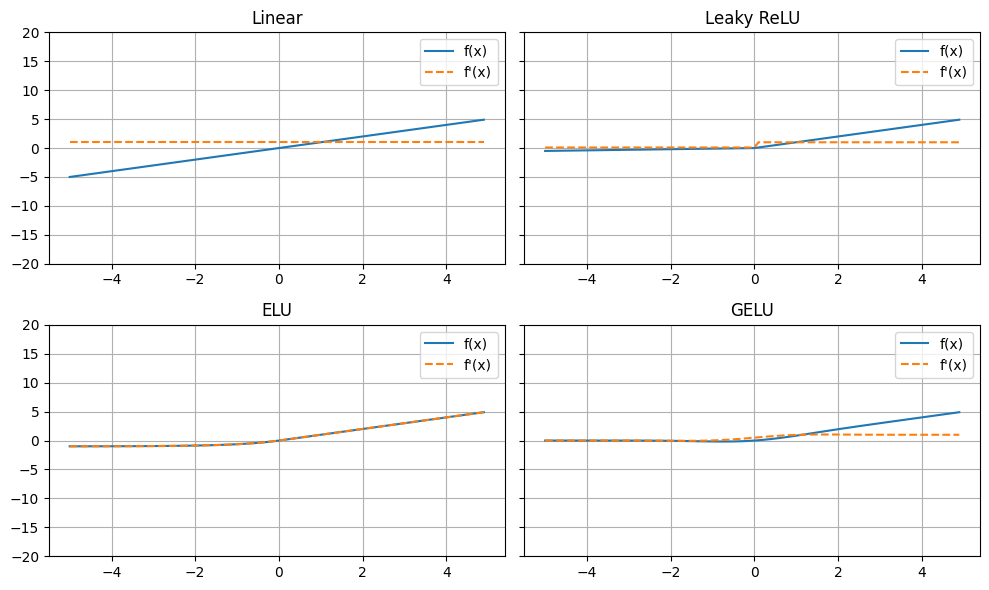

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharey=True)

# Linear
axs[0, 0].plot(x, x, label="f(x)")
axs[0, 0].plot(x, np.ones_like(x), '--', label="f'(x)")
axs[0, 0].set_title("Linear")

# Leaky ReLU
axs[0, 1].plot(x, leaky_relu(0.1, x), label="f(x)")
axs[0, 1].plot(x, derivative_leaky_relu(0.1, x), '--', label="f'(x)")
axs[0, 1].set_title("Leaky ReLU")

# ELU
axs[1, 0].plot(x, elu(1, x), label="f(x)")
axs[1, 0].plot(x, derivative_elu(1, x), '--', label="f'(x)")
axs[1, 0].set_title("ELU")

# GELU
axs[1, 1].plot(x, gelu(x), label="f(x)")
axs[1, 1].plot(x, derivative_gelu(x), '--', label="f'(x)")
axs[1, 1].set_title("GELU")

for ax in axs.flat:
    ax.set_ylim([-20, 20])
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()